In [ ]:
#K Nearest Neibour Model Project
#Done By: Layth Al-Nemri

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")

In [ ]:
#print(dataset)
import pandas as pd
#type(dataset.data)
#type(dataset.target)
data = pd.DataFrame(dataset.data)
target = pd.DataFrame(dataset.target)
df = pd.DataFrame.join(data,target)
print(df)
#dataset_features = data[0]
#print('# of features in dataset = ',len(data.columns))
print('# of features in dataset = ',dataset.data.shape[1])
#target_series = pd.Series(dataset.target)
#target_median = target_series.median()
target_median = dataset.target.median()
print('the meadian target value = ',target_median)
#large_target = 0
#for tar in target_series:
#  if tar > target_median:
#    large_target += 1
#print('the target values larger than the median = ',large_target)
print('the target values larger than the median = ',np.sum(dataset.target > target_median))
df['new_target']= (dataset.target > target_median).astype(int)
df

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,new_target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.

In [ ]:
feature_data = dataset.data
#target_data = np.array((dataset.target > target_median).astype(int))
#target_data = np.array(df['new_target'])
target_data = pd.DataFrame(df['new_target'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization?

Answer:

By comparing the the two plots above, the difference is the scale of the X and Y axises.

The graphs themselves appear simmilar, this is probably because both values were standardized, meaning the relative difference stayed the same between each point and the other.

However, both the X and Y axes has 0 as their mean value and the points are split around it, and the deviation is 1.

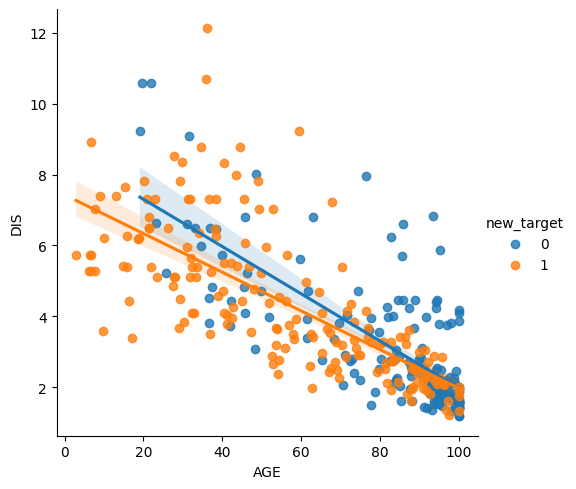

In [ ]:
plot_train = pd.DataFrame.join(X_train,y_train)
import seaborn as sns
sns.lmplot(data=plot_train, x="AGE", y="DIS", hue = "new_target")

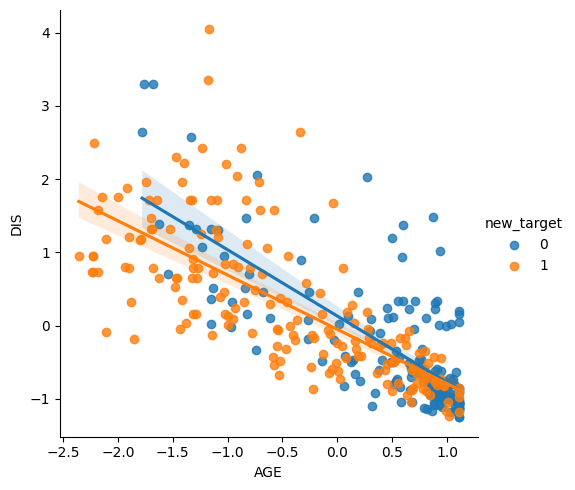

In [ ]:
#print(plot_train)
AGE_mean = plot_train['AGE'].mean()
AGE_deviation = plot_train['AGE'].std()
DIS_mean = plot_train['DIS'].mean()
DIS_deviation = plot_train['DIS'].std()
plot_train['AGE'] = plot_train.AGE.map(lambda p: ((p - AGE_mean)/AGE_deviation))
plot_train['DIS'] = plot_train.DIS.map(lambda p: ((p - DIS_mean)/DIS_deviation))
#print(plot_train)
sns.lmplot(data=plot_train, x="AGE", y="DIS", hue = "new_target")

## Part 2: KNN Classifier without Standardization
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`.
2.   What is the best `k`? What is the highest cross-validation accuracy?

The best k =  3 based on the highest accuracy

highest mean cross-validation accuracy =  80.51509054325955 %

highest cross-validation accuracy =  85.91549295774648 %

3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!).

K values between 1 and 20 are overfitting since (based on the curve) the mean cross validation for the training set is way higher than the validation set, even though a k=3 gave the highest mean validation accuracy.



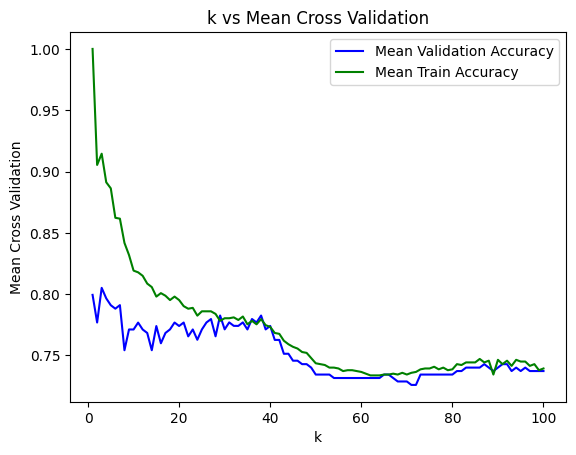

The best k =  3
highest mean cross-validation accuracy =  80.51509054325955 %
highest cross-validation accuracy =  85.91549295774648 %


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
rows = []
Best_k = 0
Max_mVa = 0
Max_Va = 0
#dif = 1
for k in range (100):
  k+=1
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train, y_train.values.ravel(), cv=5, return_train_score=True)
  mVa = scores['test_score'].mean()
  mTa = scores['train_score'].mean()
  rows.append([k, mVa, mTa])
  #mVa_mTa = abs(mVa - mTa)
  #if dif > mVa_mTa:
    #dif = mVa_mTa
    #Best_k = k
  if mVa > Max_mVa:
    Max_mVa = mVa
    Best_k = k
  for Va in scores['test_score']:
    if Va > Max_Va:
      Max_Va = Va
validation_plot = pd.DataFrame(rows, columns=["k", "Mean Validation Accuracy", 'Mean Train Accuracy'])
plt.plot(validation_plot["k"], validation_plot["Mean Validation Accuracy"],label='Mean Validation Accuracy',color='blue')
plt.plot(validation_plot["k"], validation_plot["Mean Train Accuracy"], label='Mean Train Accuracy',color='green')
plt.xlabel("k")
plt.ylabel("Mean Cross Validation")
plt.title("k vs Mean Cross Validation")
plt.legend()
plt.show()
print('The best k = ',Best_k)
print('highest mean cross-validation accuracy = ', Max_mVa*100,'%' )
print('highest cross-validation accuracy = ', Max_Va*100,'%' )


## Part 3: Feature Selection
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features.

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.

* State what is the number of essential features for classification and justify your answer.

Answer:

I believe the number of essential features is 2 (the last 2) since that's when the mean cross-validation accuracy is the highest. also, the number of neighbours required is only 5 (significantly less than the results around it) which means having these 2 features helped the model in making prediction with less values.
Also, by reducing the number of features we reduce the  dimensinality. which resulted in higher accuracy for the knn model.
  
  









In [ ]:
from sklearn import tree
def Feature_selector (X_train , y_train , tr):
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_
  #print(type(importance))
  #print(importance)
  #print(X_train,"original")
  importance1 = pd.DataFrame(importance.reshape(1, -1))
  importance1.columns = X_train.columns
  #X_train_new = X_train.append(importance1)
  X_train_new = pd.concat([X_train, importance1])
  #print(X_train_new,"after adding the row")
  #print(importance1)
  importance_sorted = X_train_new.iloc[-1].sort_values(ascending=False)
  #print(importance_sorted)
  features_sorted = importance_sorted.index
  #print(features_sorted)
  X_train_sorted = X_train_new[features_sorted]
  #print(X_train_sorted,"after sorting the columns")
  #X_train_sorted = X_train_sorted.drop(X_train_sorted.index[-1])
  X_train_sorted = X_train_sorted.iloc[:-1]
  #print(X_train_sorted,"after deleting the row")

  removed_features_list = []
  mCVs_list = []
  k_list = []
  Max_mCVs = Max_mVa
  while (Max_mCVs > (tr*Max_mVa)) and (X_train_sorted.shape[1] > 1):
    removed_features_list.append(X_train_sorted.columns[-1])
    X_train_sorted = X_train_sorted.drop(X_train_sorted.columns[-1],axis=1)
    #print(X_train_sorted,"after deleting the column")

    Max_mCVs = 0
    Max_mCVs_k = 0
    for k in range (100):
      k+=1
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_train_sorted, y_train.values.ravel(), cv=5, return_train_score=True)
      mCVs = scores['test_score'].mean()
      if mCVs > Max_mCVs:
        Max_mCVs = mCVs
        Max_mCVs_k = k
    mCVs_list.append(Max_mCVs)
    k_list.append(Max_mCVs_k)
  #print(removed_features_list, mCVs_list, k_list)
  #print(X_train_sorted)
  #plt.bar([x for x in range(len(importance))], importance)
  #plt.show()
  return removed_features_list, mCVs_list, k_list
removed_features_list, mCVs_list, k_list = Feature_selector (X_train , y_train, 0.95)
#removed_features_list, mCVs_list, k_list


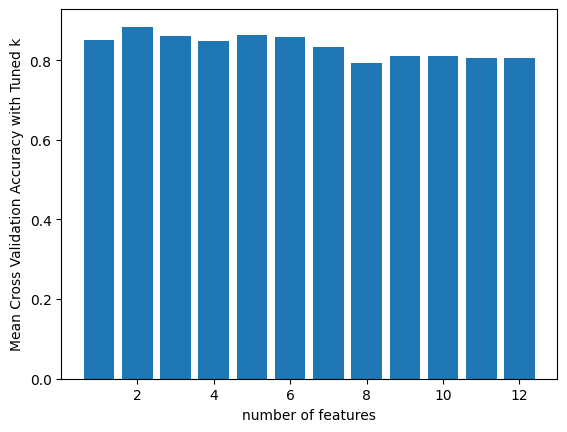

In [ ]:
plt.bar([-x+len(removed_features_list) for x in range(len(removed_features_list))], mCVs_list)
plt.xlabel('number of features')
plt.ylabel('Mean Cross Validation Accuracy with Tuned k')
plt.show()

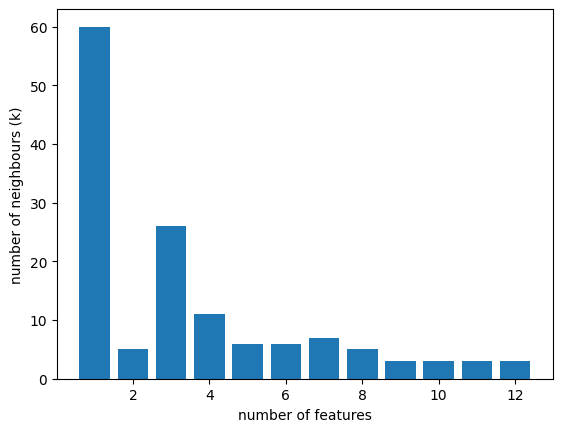

In [ ]:
plt.bar([-x+len(removed_features_list) for x in range(len(removed_features_list))], k_list)
plt.xlabel('number of features')
plt.ylabel('number of neighbours (k)')
plt.show()

In [ ]:
print(k_list)
print(mCVs_list)

[3, 3, 3, 3, 5, 7, 6, 6, 11, 26, 5, 60]
[0.8051509054325955, 0.8051509054325955, 0.8108249496981891, 0.8108249496981891, 0.7938430583501006, 0.8333601609657947, 0.8587525150905433, 0.8643863179074446, 0.8475251509054328, 0.861569416498994, 0.8841046277665996, 0.8503420523138832]


## Part 4: Standardization

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance?

Answer:

The mean cross-validation accuracy is significantly less while using more features, but they are almost the same while using features with higher importance (even more while using 2 features)


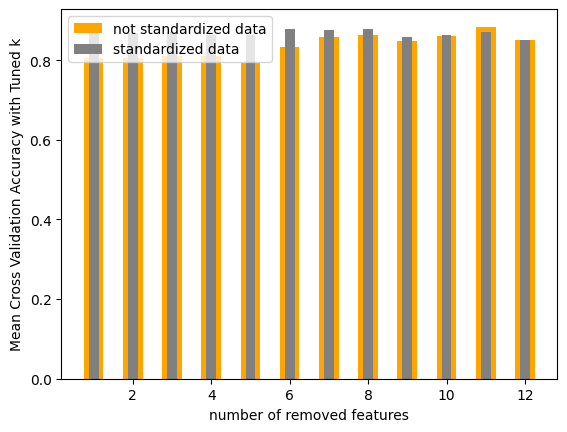

In [ ]:
from sklearn import preprocessing
X_train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized = X_train_scaler.transform(X_train)
#X_train_standardized
#type(X_train_standardized)
X_train_standardized = pd.DataFrame(X_train_standardized)
X_train_standardized.columns = X_train.columns
#X_train_standardized

X_test_scaler = preprocessing.StandardScaler().fit(X_test)
X_test_standardized = X_test_scaler.transform(X_test)
X_test_standardized = pd.DataFrame(X_test_standardized)
X_test_standardized.columns = X_test.columns

removed_features_list_standardized, mCVs_list_standardized, k_list_standardized = Feature_selector (X_train_standardized , y_train, 0.95)
plt.bar([x+1 for x in range(len(removed_features_list))], mCVs_list, label = 'not standardized data', color = 'orange',width=0.5)
plt.bar([x+1 for x in range(len(removed_features_list_standardized))], mCVs_list_standardized, label = 'standardized data', color='grey',width=0.25)
plt.xlabel('number of removed features')
plt.ylabel('Mean Cross Validation Accuracy with Tuned k')
plt.legend()
plt.show()

## Part 5: Decision Tree Classifier

Train a decision tree classifier on the standardized dataset. Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.

 Answer:

 the KNN has a higher mean CV score when using all features than The decision tree classifier.
 The decision tree classifier however, was significantly faster.

 The best number of neighbours for knn was 3, the best max_depth for the decision tree classifier is 2, and the best min_samples_split is 2.


In [ ]:
Best_max_depth = 0
Best_min_samples_split = 0
Max_mVa_DTC = 0
for i in range (20):
      i+=2
      for j in range(20):
        j+=2
        DTC = tree.DecisionTreeClassifier(max_depth = i, min_samples_split = j, random_state=0)
        scores_DTC = cross_validate(DTC, X_train_standardized, y_train.values.ravel(), cv=5, return_train_score=True)
        mVa_DTC = scores['test_score'].mean()
        if mVa_DTC > Max_mVa_DTC:
          Max_mVa_DTC = mVa_DTC
          Best_max_depth = i
          Best_min_samples_split = j
if Max_mVa_DTC > Max_mVa:
  print('dicision tree classifier maximum mean CV score(',Max_mVa_DTC,') > KNN maximum mean CV score(',Max_mVa,')')
elif Max_mVa_DTC < Max_mVa:
  print('dicision tree classifier maximum mean CV score(',Max_mVa_DTC,') < KNN maximum mean CV score(',Max_mVa,')')
else:
  print('dicision tree classifier maximum mean CV score(',Max_mVa_DTC,') == KNN maximum mean CV score(',Max_mVa,')')
print('Best_max_depth=',Best_max_depth)
print('Best_min_samples_split',Best_min_samples_split)

dicision tree classifier maximum mean CV score( 0.7373038229376258 ) < KNN maximum mean CV score( 0.8051509054325955 )
Best_max_depth= 2
Best_min_samples_split 2


## Part 6: Test Data

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Answer:

The highest mean CV accuracy was with the KNN while using only 2 features and number of neighbours = 5. Also by doing so, we reduce the  dimensinality.

The resulting Test set accuracy:  80.26 %
It is close to the training cross-validation accuracy (88.4%) but not very much.
The difference could be because of the data quality or when splitting the data randomly it was a bit biased.

In [ ]:
#sorting X_train values and removing the least important 11 features (only keeping 2)
final_dt = tree.DecisionTreeClassifier(random_state=0)
final_dt.fit(X_train,y_train)
final_importance = final_dt.feature_importances_
final_importance1 = pd.DataFrame(final_importance.reshape(1, -1))
final_importance1.columns = X_train.columns
final_X_train_new = pd.concat([X_train, final_importance1])
final_importance_sorted = final_X_train_new.iloc[-1].sort_values(ascending=False)
final_features_sorted = final_importance_sorted.index
final_X_train_sorted = final_X_train_new[final_features_sorted]
final_X_train_sorted = final_X_train_sorted.iloc[:-1]
for r in range (11):
  final_X_train_sorted = final_X_train_sorted.drop(final_X_train_sorted.columns[-1],axis=1)

#sorting X_test same as X_train and removing the same features
final_X_test_new = pd.concat([X_test, final_importance1])
final_test_importance_sorted = final_X_test_new.iloc[-1].sort_values(ascending=False)
final_test_features_sorted = final_test_importance_sorted.index
final_X_test_sorted = final_X_test_new[final_test_features_sorted]
final_X_test_sorted = final_X_test_sorted.iloc[:-1]
for r in range (11):
  final_X_test_sorted = final_X_test_sorted.drop(final_X_test_sorted.columns[-1],axis=1)



from sklearn.metrics import accuracy_score
knn_final = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_final.fit(final_X_train_sorted,y_train.values.ravel())
test_accuracy = accuracy_score(y_test, knn_final.predict(final_X_test_sorted))
print ("Test set accuracy: ", test_accuracy * 100, "%")

Test set accuracy:  80.26315789473685 %
